In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
import numpy as np
from pulp import *
import seaborn as sn

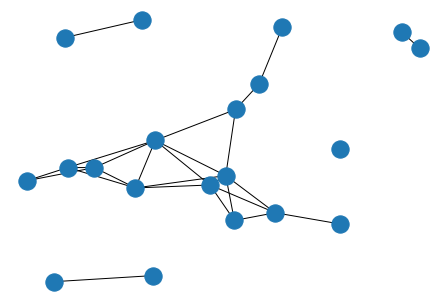

In [2]:
import numpy as np
from scipy import spatial
import networkx as nx
import matplotlib.pyplot as plt
nnodes = 20
r = 0.25
positions =  np.random.rand(nnodes,2)
kdtree = spatial.KDTree(positions)
pairs = kdtree.query_pairs(r)
G = nx.Graph()
G.add_nodes_from(range(nnodes))
G.add_edges_from(list(pairs))
pos = dict(zip(range(nnodes),positions))
nx.draw(G,pos)
plt.show()

In [3]:
ll = list()
for i in pos:
    ll.append(pos[i][0])
rr = list()
for i in pos:
    rr.append(pos[i][1])
    

In [4]:
ll[0]

0.08885907368605017

In [5]:
rr[0]

0.1214792390600492

In [6]:
pos[0]

array([0.08885907, 0.12147924])

In [7]:
df = pd.DataFrame()
df['Left'] = ll
df['Right'] = rr

In [8]:
df

,Left,Right
0,0.088859,0.121479
1,0.516981,0.325920
2,0.185695,0.502350
3,0.914551,0.953445
4,0.329572,0.593020
5,0.496494,0.475644
6,0.297127,0.995354
7,0.768052,0.313915
8,0.575545,0.781646
9,0.613512,0.351668


In [9]:
df['coordinate'] = list(zip(df['Left'],df['Right']))
df['ID'] = df.index

In [10]:
df

,Left,Right,coordinate,ID
0,0.088859,0.121479,"(0.08885907368605017, 0.1214792390600492)",0
1,0.516981,0.325920,"(0.5169813005182402, 0.3259196925054628)",1
2,0.185695,0.502350,"(0.1856947663095072, 0.5023501236895127)",2
3,0.914551,0.953445,"(0.9145514316673512, 0.9534446107405151)",3
4,0.329572,0.593020,"(0.3295721823960476, 0.5930204540630658)",4
5,0.496494,0.475644,"(0.49649366962951347, 0.47564374972914325)",5
6,0.297127,0.995354,"(0.2971268609666674, 0.9953543496107603)",6
7,0.768052,0.313915,"(0.7680517567718768, 0.3139148829899212)",7
8,0.575545,0.781646,"(0.5755451777046957, 0.7816457735219292)",8
9,0.613512,0.351668,"(0.6135123809485645, 0.35166841647460056)",9


In [11]:
import haversine as hs
from haversine import Unit

In [12]:
def dist_from(loc1,loc2): 
    dist=hs.haversine(loc1,loc2)
    return round(dist,2)

In [13]:
# parse location one by one to dist_from
for _,row in df.iterrows():
    df[row.ID]=df['coordinate'].apply(lambda x: dist_from(row.coordinate,x))

In [14]:
df.head()

,Left,Right,coordinate,ID,0,1,2,3,4,5,...,10,11,12,13,14,15,16,17,18,19
0,0.088859,0.121479,"(0.08885907368605017, 0.1214792390600492)",0,0.00,52.75,43.70,130.33,58.87,60.04,...,90.02,42.54,112.09,26.25,79.88,90.68,40.94,129.56,38.12,54.64
1,0.516981,0.325920,"(0.5169813005182402, 0.3259196925054628)",1,52.75,0.00,41.74,82.60,36.28,16.80,...,38.38,48.09,72.90,29.65,41.19,81.21,28.70,80.36,56.58,14.64
2,0.185695,0.502350,"(0.1856947663095072, 0.5023501236895127)",2,43.70,41.74,0.00,95.31,18.91,34.69,...,64.95,7.06,71.90,42.94,42.95,48.89,13.17,96.36,18.45,31.10
3,0.914551,0.953445,"(0.9145514316673512, 0.9534446107405151)",3,130.33,82.60,95.31,0.00,76.40,70.59,...,46.27,101.37,31.63,111.60,52.39,88.78,90.91,7.42,113.13,75.94
4,0.329572,0.593020,"(0.3295721823960476, 0.5930204540630658)",4,58.87,36.28,18.91,76.40,0.00,22.69,...,48.68,25.15,53.78,50.17,24.06,44.96,18.38,77.53,36.96,21.94


In [15]:
distances_df=df.iloc[:,4:4183]
#distances_df.index=df.ID
distances_df.insert(0, 'ID', df.ID)

distances_df

,ID,0,1,2,3,4,5,6,7,8,...,10,11,12,13,14,15,16,17,18,19
0,0,0.00,52.75,43.70,130.33,58.87,60.04,99.89,78.50,91.20,...,90.02,42.54,112.09,26.25,79.88,90.68,40.94,129.56,38.12,54.64
1,1,52.75,0.00,41.74,82.60,36.28,16.80,78.35,27.95,51.09,...,38.38,48.09,72.90,29.65,41.19,81.21,28.70,80.36,56.58,14.64
2,2,43.70,41.74,0.00,95.31,18.91,34.69,56.20,68.06,53.33,...,64.95,7.06,71.90,42.94,42.95,48.89,13.17,96.36,18.45,31.10
3,3,130.33,82.60,95.31,0.00,76.40,70.59,68.81,72.95,42.26,...,46.27,101.37,31.63,111.60,52.39,88.78,90.91,7.42,113.13,75.94
4,4,58.87,36.28,18.91,76.40,0.00,22.69,44.88,57.80,34.47,...,48.68,25.15,53.78,50.17,24.06,44.96,18.38,77.53,36.96,21.94
5,5,60.04,16.80,34.69,70.59,22.69,0.00,61.89,35.14,35.14,...,31.60,41.72,57.13,41.78,24.67,66.44,24.20,69.54,52.39,5.41
6,6,99.89,78.35,56.20,68.81,44.88,61.89,0.00,92.10,39.03,...,70.84,58.14,37.18,94.95,41.45,21.14,62.39,73.94,66.90,63.87
7,7,78.50,27.95,68.06,72.95,57.80,35.14,92.10,0.00,56.24,...,27.86,74.81,74.70,52.95,50.70,100.22,55.60,68.47,84.10,37.27
8,8,91.20,51.09,53.33,42.26,34.47,35.14,39.03,56.24,0.00,...,32.15,59.19,21.99,76.44,11.34,53.89,50.50,44.25,70.92,39.68
9,9,63.71,11.11,50.44,74.81,41.44,18.96,79.75,17.69,47.99,...,29.14,57.15,68.95,39.75,39.72,85.36,37.91,71.90,66.43,20.00


In [16]:
dist_dict={}

In [17]:
#positions to be plotted
locations = dict( ( ID, (df.loc[ID, 'Left'], df.loc[ID, 'Right']) ) for ID in df.index)
locations

{0: (0.08885907368605017, 0.1214792390600492),
 1: (0.5169813005182402, 0.3259196925054628),
 2: (0.1856947663095072, 0.5023501236895127),
 3: (0.9145514316673512, 0.9534446107405151),
 4: (0.3295721823960476, 0.5930204540630658),
 5: (0.49649366962951347, 0.47564374972914325),
 6: (0.2971268609666674, 0.9953543496107603),
 7: (0.7680517567718768, 0.3139148829899212),
 8: (0.5755451777046957, 0.7816457735219292),
 9: (0.6135123809485645, 0.35166841647460056),
 10: (0.7664441522067543, 0.5645215985930526),
 11: (0.12224140824014251, 0.5025635764835205),
 12: (0.6306333117350871, 0.9715882631102201),
 13: (0.3240444737778735, 0.14183472730734115),
 14: (0.5197389875196657, 0.6963334086595755),
 15: (0.11630499265505767, 0.9365436513915613),
 16: (0.2827971574774133, 0.43445809965510196),
 17: (0.9553362375150678, 0.9005659672507196),
 18: (0.0256933510799624, 0.4584454239020901),
 19: (0.4592950819485514, 0.44429460377919505)}

In [18]:
distances_df

,ID,0,1,2,3,4,5,6,7,8,...,10,11,12,13,14,15,16,17,18,19
0,0,0.00,52.75,43.70,130.33,58.87,60.04,99.89,78.50,91.20,...,90.02,42.54,112.09,26.25,79.88,90.68,40.94,129.56,38.12,54.64
1,1,52.75,0.00,41.74,82.60,36.28,16.80,78.35,27.95,51.09,...,38.38,48.09,72.90,29.65,41.19,81.21,28.70,80.36,56.58,14.64
2,2,43.70,41.74,0.00,95.31,18.91,34.69,56.20,68.06,53.33,...,64.95,7.06,71.90,42.94,42.95,48.89,13.17,96.36,18.45,31.10
3,3,130.33,82.60,95.31,0.00,76.40,70.59,68.81,72.95,42.26,...,46.27,101.37,31.63,111.60,52.39,88.78,90.91,7.42,113.13,75.94
4,4,58.87,36.28,18.91,76.40,0.00,22.69,44.88,57.80,34.47,...,48.68,25.15,53.78,50.17,24.06,44.96,18.38,77.53,36.96,21.94
5,5,60.04,16.80,34.69,70.59,22.69,0.00,61.89,35.14,35.14,...,31.60,41.72,57.13,41.78,24.67,66.44,24.20,69.54,52.39,5.41
6,6,99.89,78.35,56.20,68.81,44.88,61.89,0.00,92.10,39.03,...,70.84,58.14,37.18,94.95,41.45,21.14,62.39,73.94,66.90,63.87
7,7,78.50,27.95,68.06,72.95,57.80,35.14,92.10,0.00,56.24,...,27.86,74.81,74.70,52.95,50.70,100.22,55.60,68.47,84.10,37.27
8,8,91.20,51.09,53.33,42.26,34.47,35.14,39.03,56.24,0.00,...,32.15,59.19,21.99,76.44,11.34,53.89,50.50,44.25,70.92,39.68
9,9,63.71,11.11,50.44,74.81,41.44,18.96,79.75,17.69,47.99,...,29.14,57.15,68.95,39.75,39.72,85.36,37.91,71.90,66.43,20.00


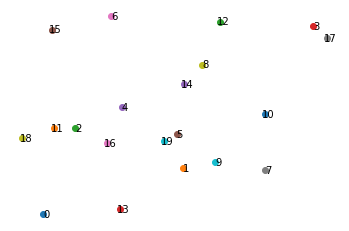

In [19]:
for l in locations:
    lo = locations[l]
    plt.plot(lo[0],lo[1],'o')
    plt.text(lo[0]+.01,lo[1],l,horizontalalignment='center',verticalalignment='center')
    
plt.gca().axis('off');

In [20]:
df.to_csv('distance1.csv')

In [21]:
distance = pd.read_csv(r'C:\Users\sawag\Desktop\Testing\Opt1\Optimal-City-Resource-Deployment-and-Path-Planning-with-Multiple-City-Agencies-main\route_trials\distance1.csv')

In [22]:
distance

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.00,52.75,43.70,130.33,58.87,60.04,99.89,78.50,91.20,63.71,90.02,42.54,112.09,26.25,79.88,90.68,40.94,129.56,38.12,54.64
1,52.75,0.00,41.74,82.60,36.28,16.80,78.35,27.95,51.09,11.11,38.38,48.09,72.90,29.65,41.19,81.21,28.70,80.36,56.58,14.64
2,43.70,41.74,0.00,95.31,18.91,34.69,56.20,68.06,53.33,50.44,64.95,7.06,71.90,42.94,42.95,48.89,13.17,96.36,18.45,31.10
3,130.33,82.60,95.31,0.00,76.40,70.59,68.81,72.95,42.26,74.81,46.27,101.37,31.63,111.60,52.39,88.78,90.91,7.42,113.13,75.94
4,58.87,36.28,18.91,76.40,0.00,22.69,44.88,57.80,34.47,41.44,48.68,25.15,53.78,50.17,24.06,44.96,18.38,77.53,36.96,21.94
5,60.04,16.80,34.69,70.59,22.69,0.00,61.89,35.14,35.14,18.96,31.60,41.72,57.13,41.78,24.67,66.44,24.20,69.54,52.39,5.41
6,99.89,78.35,56.20,68.81,44.88,61.89,0.00,92.10,39.03,79.75,70.84,58.14,37.18,94.95,41.45,21.14,62.39,73.94,66.90,63.87
7,78.50,27.95,68.06,72.95,57.80,35.14,92.10,0.00,56.24,17.69,27.86,74.81,74.70,52.95,50.70,100.22,55.60,68.47,84.10,37.27
8,91.20,51.09,53.33,42.26,34.47,35.14,39.03,56.24,0.00,47.99,32.15,59.19,21.99,76.44,11.34,53.89,50.50,44.25,70.92,39.68
9,63.71,11.11,50.44,74.81,41.44,18.96,79.75,17.69,47.99,0.00,29.14,57.15,68.95,39.75,39.72,85.36,37.91,71.90,66.43,20.00


In [25]:
type(df.ID[0])

numpy.int64

In [26]:

# get distance in a dictionary form
distances = dict( ((l1,l2), distance.iloc[l1, l2] ) for l1 in locations for l2 in locations if l1!=l2)
distances

{(0, 1): 52.75,
 (0, 2): 43.7,
 (0, 3): 130.33,
 (0, 4): 58.87,
 (0, 5): 60.04,
 (0, 6): 99.89,
 (0, 7): 78.5,
 (0, 8): 91.2,
 (0, 9): 63.71,
 (0, 10): 90.02,
 (0, 11): 42.54,
 (0, 12): 112.09,
 (0, 13): 26.25,
 (0, 14): 79.88,
 (0, 15): 90.68,
 (0, 16): 40.94,
 (0, 17): 129.56,
 (0, 18): 38.12,
 (0, 19): 54.64,
 (1, 0): 52.75,
 (1, 2): 41.74,
 (1, 3): 82.6,
 (1, 4): 36.28,
 (1, 5): 16.8,
 (1, 6): 78.35,
 (1, 7): 27.95,
 (1, 8): 51.09,
 (1, 9): 11.11,
 (1, 10): 38.38,
 (1, 11): 48.09,
 (1, 12): 72.9,
 (1, 13): 29.65,
 (1, 14): 41.19,
 (1, 15): 81.21,
 (1, 16): 28.7,
 (1, 17): 80.36,
 (1, 18): 56.58,
 (1, 19): 14.64,
 (2, 0): 43.7,
 (2, 1): 41.74,
 (2, 3): 95.31,
 (2, 4): 18.91,
 (2, 5): 34.69,
 (2, 6): 56.2,
 (2, 7): 68.06,
 (2, 8): 53.33,
 (2, 9): 50.44,
 (2, 10): 64.95,
 (2, 11): 7.06,
 (2, 12): 71.9,
 (2, 13): 42.94,
 (2, 14): 42.95,
 (2, 15): 48.89,
 (2, 16): 13.17,
 (2, 17): 96.36,
 (2, 18): 18.45,
 (2, 19): 31.1,
 (3, 0): 130.33,
 (3, 1): 82.6,
 (3, 2): 95.31,
 (3, 4): 76.4,
 (3,

In [27]:
V = 5 #the number vehicles/people deployed

In [28]:
#problem
prob=LpProblem("vehicle", LpMinimize)

In [29]:
#indicates if location i is connected to location j along route 
indicator = LpVariable.dicts('indicator',distances, 0,1,LpBinary)
#elimiate subtours
eliminator = LpVariable.dicts('eliminator', df.ID, 0, len(df.ID)-1, LpInteger)

In [30]:
type(indicator)

dict

In [31]:
type(distances)

dict

In [32]:
cost = lpSum([indicator[(i,j)]*distances[(i,j)] for (i,j) in distances])
prob+=cost

In [33]:
#constraints
for v in df.ID:
    cap = 1 if v != 14 else V
    #inward possible route
    prob+= lpSum([ indicator[(i,v)] for i in df.ID if (i,v) in indicator]) ==cap
    #outward possible route
    prob+=lpSum([ indicator[(v,i)] for i in df.ID if (v,i) in indicator]) ==cap
    
#subtour elimination
num=len(df.ID)/V
for i in df.ID:
    for j in df.ID:
        if i != j and (i != 14 and j!= 14) and (i,j) in indicator:
            prob += eliminator[i] - eliminator[j] <= (num)*(1-indicator[(i,j)]) - 1

In [34]:
%time prob.solve()
print(LpStatus[prob.status])

Wall time: 32min 24s
Optimal


In [35]:
feasible_edges = [ e for e in indicator if value(indicator[e]) != 0 ]

def get_next_loc(initial):
    '''to get the next edge'''
    edges = [e for e in feasible_edges if e[0]==initial]
    for e in edges:
        feasible_edges.remove(e)
    return edges

In [36]:
routes = get_next_loc(14)
routes = [ [e] for e in routes ]

for r in routes:
    while r[-1][1] !=14:
        r.append(get_next_loc(r[-1][1])[-1])

In [44]:
routes

[[(14, 1), (1, 9), (9, 7), (7, 10), (10, 14)],
 [(14, 2), (2, 16), (16, 19), (19, 5), (5, 14)],
 [(14, 6), (6, 15), (15, 4), (4, 14)],
 [(14, 8), (8, 12), (12, 3), (3, 17), (17, 14)],
 [(14, 11), (11, 18), (18, 0), (0, 13), (13, 14)]]

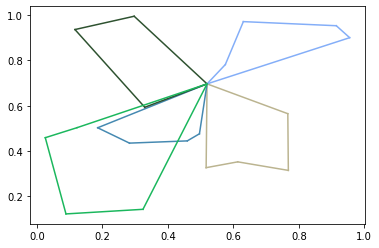

In [41]:
#outline the routes
coloured_loc = [np.random.rand(3) for i in range(len(routes))]
for r,co in zip(routes,coloured_loc):
    for a,b in r:
        l1,l2 = locations[a], locations[b]
        plt.plot([l1[0],l2[0]],[l1[1],l2[1]], color=co)

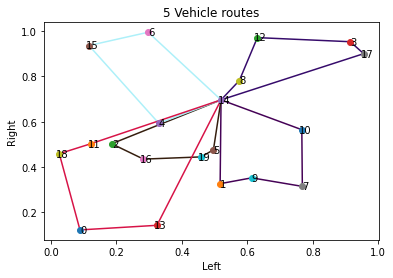

In [45]:
#outline the routes
coloured_loc = [np.random.rand(3) for i in range(len(routes))]
for r,co in zip(routes,coloured_loc):
    for a,b in r:
        l1,l2 = locations[a], locations[b]
        plt.plot([l1[0],l2[0]],[l1[1],l2[1]], color=co)
for l in locations:
    lo = locations[l]
    plt.plot(lo[0],lo[1],'o')
    plt.text(lo[0]+.01,lo[1],l,horizontalalignment='center',verticalalignment='center')
    
    
plt.title('%d '%V + 'Vehicle routes' if V > 1 else 'Vehicle route')
plt.xlabel('Left')
plt.ylabel('Right')
plt.show()

In [40]:
routes

[[(14, 1), (1, 9), (9, 7), (7, 10), (10, 14)],
 [(14, 2), (2, 16), (16, 19), (19, 5), (5, 14)],
 [(14, 6), (6, 15), (15, 4), (4, 14)],
 [(14, 8), (8, 12), (12, 3), (3, 17), (17, 14)],
 [(14, 11), (11, 18), (18, 0), (0, 13), (13, 14)]]